In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
from sklearn.tree import export_graphviz
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# import dataset
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


### Shape of the dataset

In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (2000, 26)


In [8]:
df["class"].unique()

array(['poisonous', 'edible'], dtype=object)

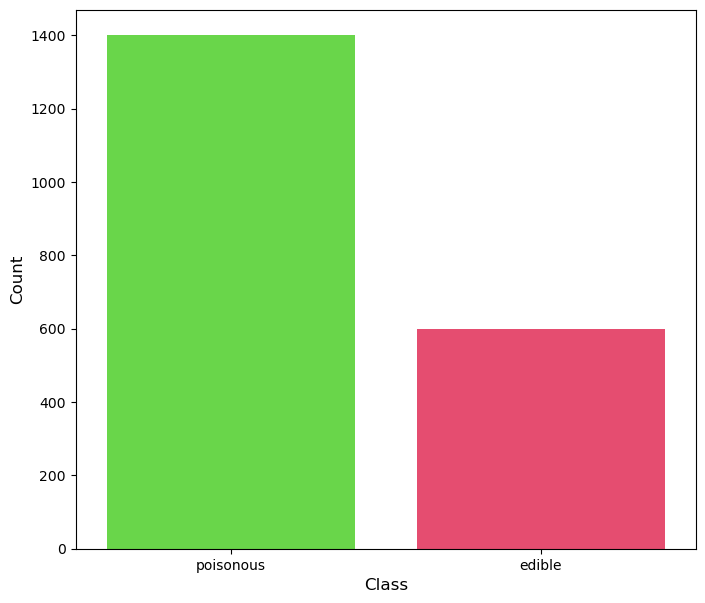

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

### The dataset is balanced.

# Data Manipulation

#### The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

#### This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [11]:
df = df.astype('category')

In [12]:
df.dtypes

Unnamed: 0                  category
cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

In [15]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [16]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


### The column "veil-type" is 0 and not contributing to the data so we remove it.

### Quick look at the characteristics of the data

### The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

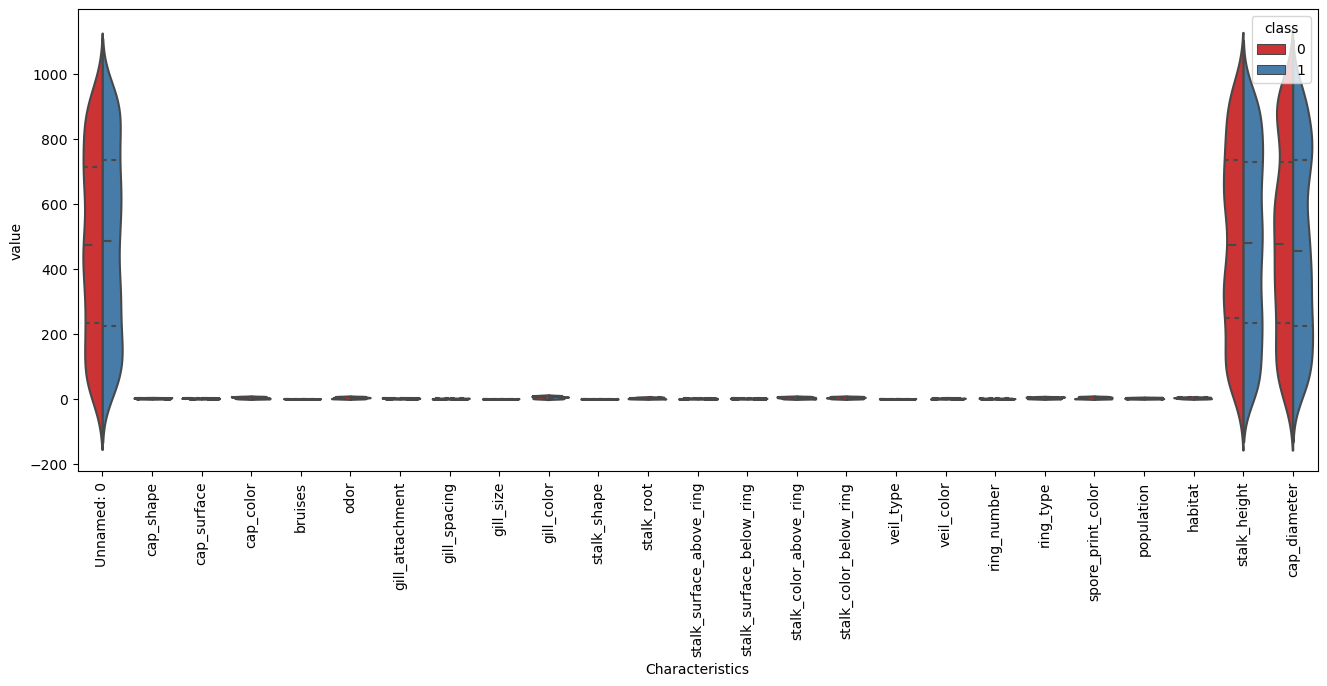

In [19]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

### Let's look at the correlation between the variables

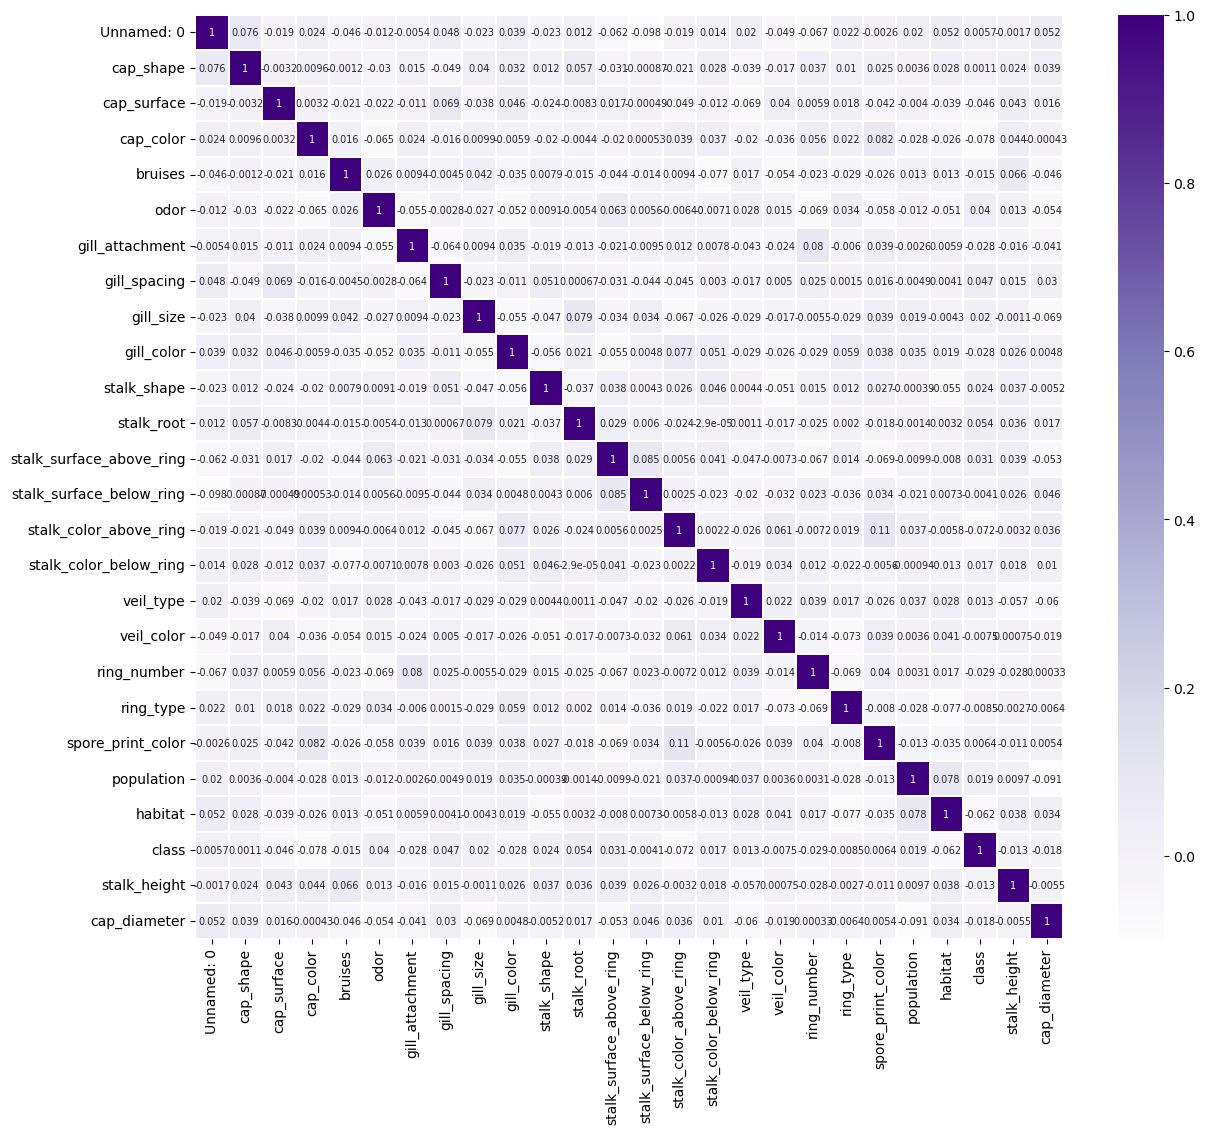

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

#### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

C:\Users\SAI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


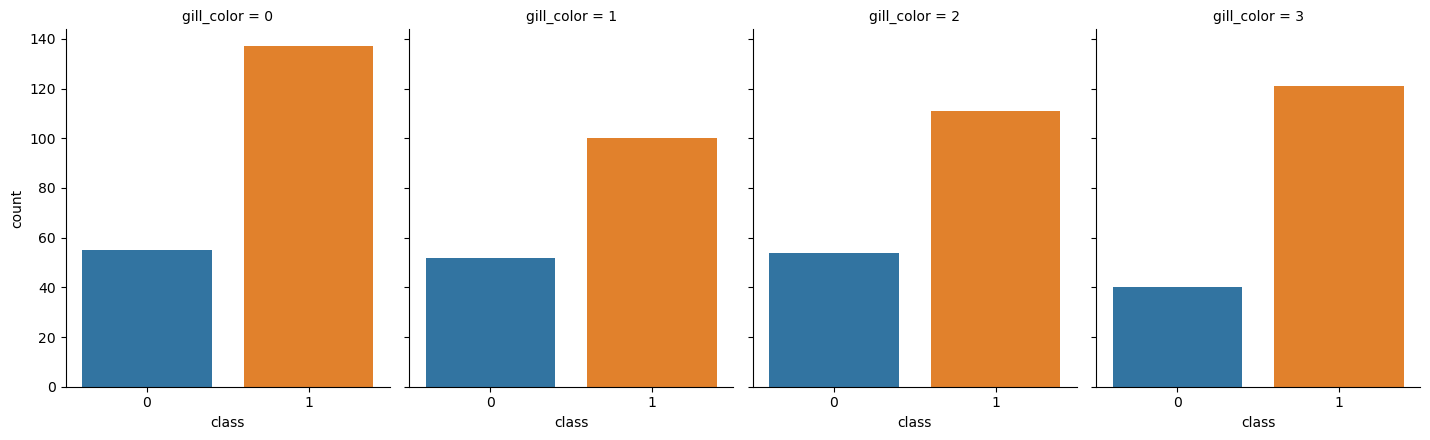

In [26]:
import seaborn as sns

new_var = df[['class', 'gill_color']]
new_var = new_var[new_var['gill_color'] <= 3.5]
sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4)


C:\Users\SAI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


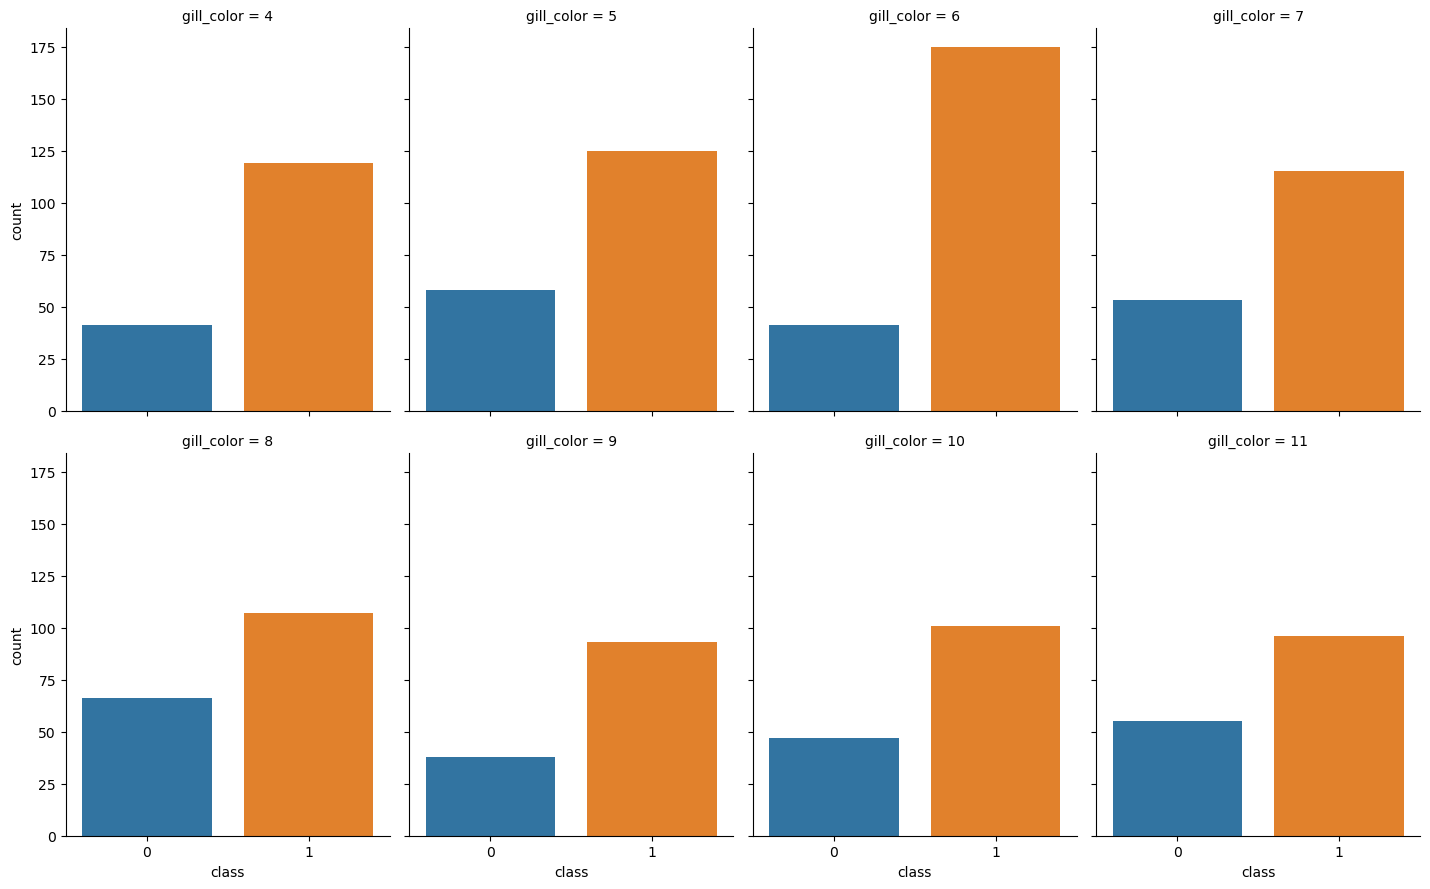

In [30]:
sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4)

# Preparing the Data

##### Setting X and y axis and splitting the data into train and test respectively.

In [35]:
# Define feature matrix X (all columns except 'class')
X = df.drop(['class'], axis=1)
# Define target vector y ('class' column)
y = df["class"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


# Classification Methods

## 1. Decision Tree Classification

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Feature importance

#### By all methods examined before the feature that is most important is "gill-color".

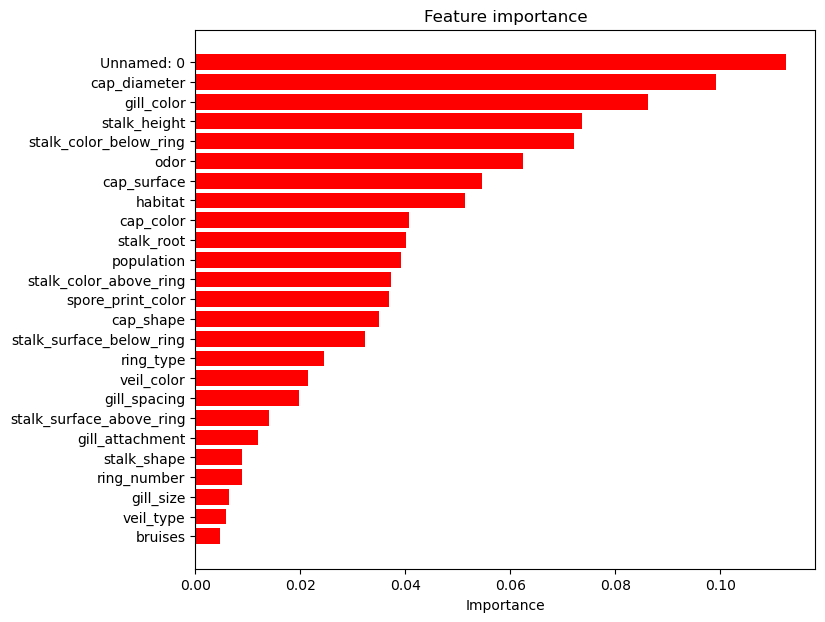

In [48]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

### Predicting and estimating the result

In [49]:
y_pred_dt = dt.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
# Print the classification report
print("Decision Tree Classifier report:\n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report:

               precision    recall  f1-score   support

           0       0.87      0.82      0.85        67
           1       0.91      0.94      0.93       133

    accuracy                           0.90       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.90      0.90      0.90       200



In [52]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 90.0%


### Confusion Matrix for Decision Tree Classifier

[[ 55  12]
 [  8 125]]


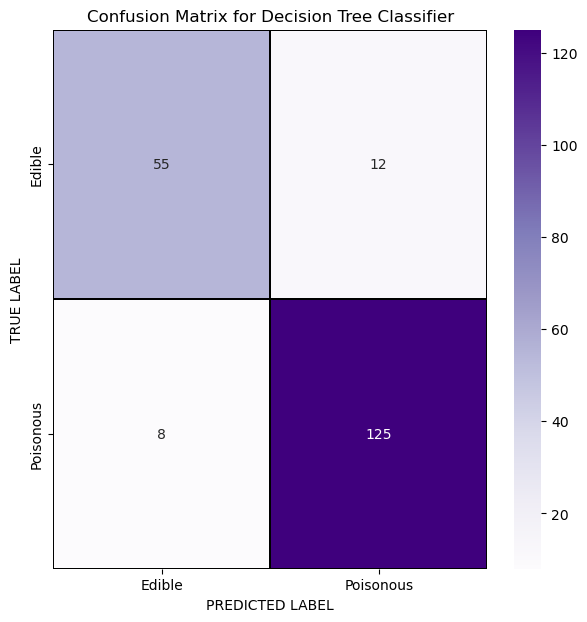

In [55]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Define labels for the confusion matrix
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

# Print the confusion matrix
print(cm)
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 2. Logistic Regression Classification


In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 67.0%


C:\Users\SAI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Classification report of Logistic Regression Classifier


In [57]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.67      1.00      0.80       133

    accuracy                           0.67       200
   macro avg       0.83      0.51      0.42       200
weighted avg       0.78      0.67      0.54       200



### Confusion Matrix for Logistic Regression Classifier

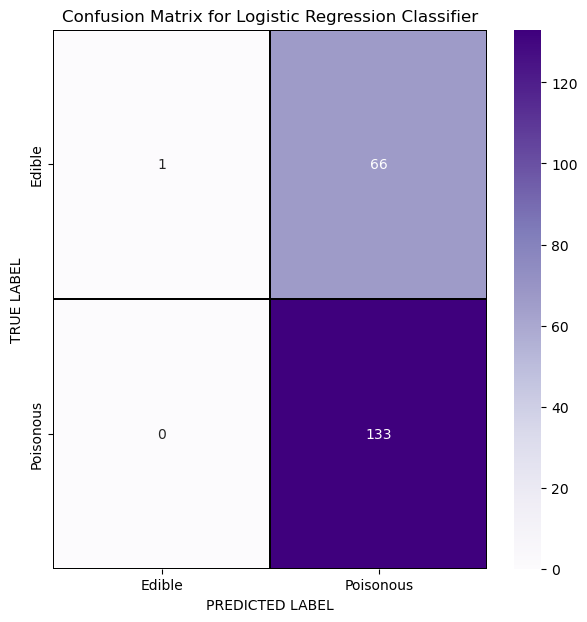

In [58]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 3. KNN Classification

In [63]:
import numpy as np

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

best_Kvalue = 0
best_score = 0

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_np, y_train_np)
    score = knn.score(X_test_np, y_test_np)
    if score > best_score:
        best_score = score
        best_Kvalue = i
        
print("Best KNN Value:", best_Kvalue)
print("Test Accuracy: {:.2f}%".format(best_score * 100))


Best KNN Value: 1
Test Accuracy: 88.00%


### Confusion Matrix for KNN Classifier

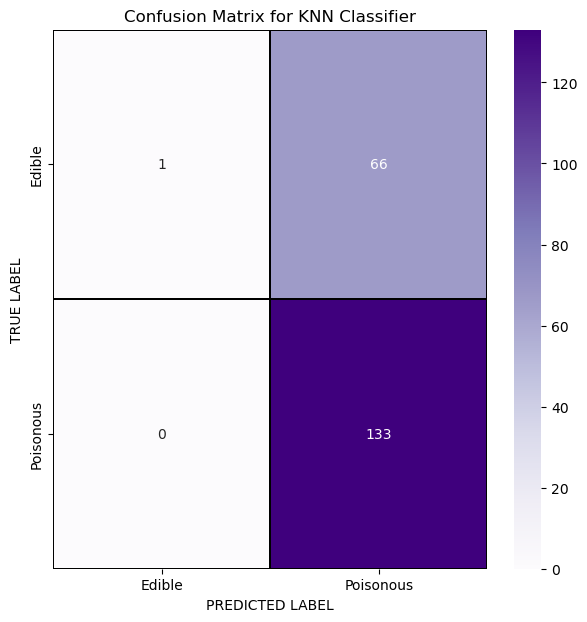

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated the confusion matrix (cm)
# and defined x_axis_labels, y_axis_labels

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## 4. SVM Classification

In [66]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.0%


#### Classification report of SVM Classifier

In [68]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.86      1.00      0.92       133

    accuracy                           0.89       200
   macro avg       0.93      0.84      0.86       200
weighted avg       0.91      0.89      0.88       200



### Confusion Matrix for SVM Classifier

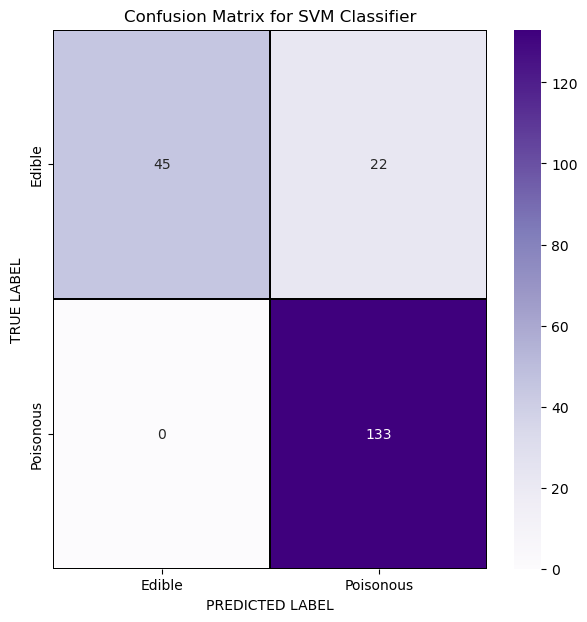

In [69]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 5. Naive Bayes Classification

In [70]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 65.5%


#### Classification report of Naive Bayes Classifier

In [71]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.25      0.01      0.03        67
           1       0.66      0.98      0.79       133

    accuracy                           0.66       200
   macro avg       0.46      0.50      0.41       200
weighted avg       0.52      0.66      0.53       200



### Confusion Matrix for Naive Bayes Classifier

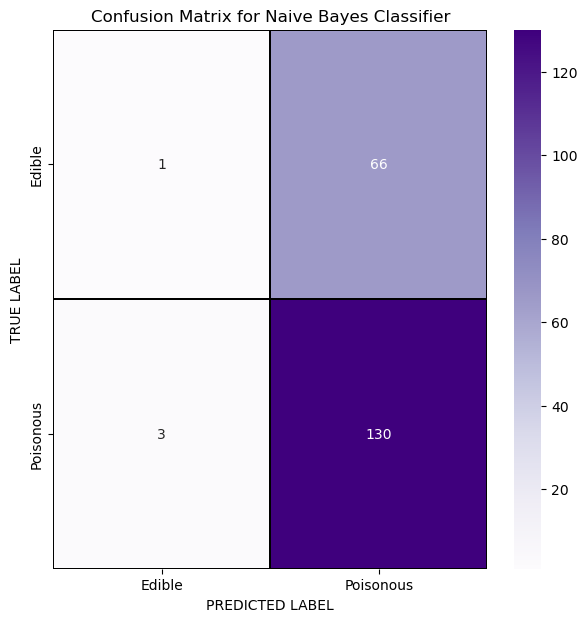

In [72]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 6. Random Forest Classification

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.5%


#### Classification report of Random Forest Classifier

In [74]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.69      0.81        67
           1       0.86      1.00      0.93       133

    accuracy                           0.90       200
   macro avg       0.93      0.84      0.87       200
weighted avg       0.91      0.90      0.89       200



### Confusion Matrix for Random Forest Classifier

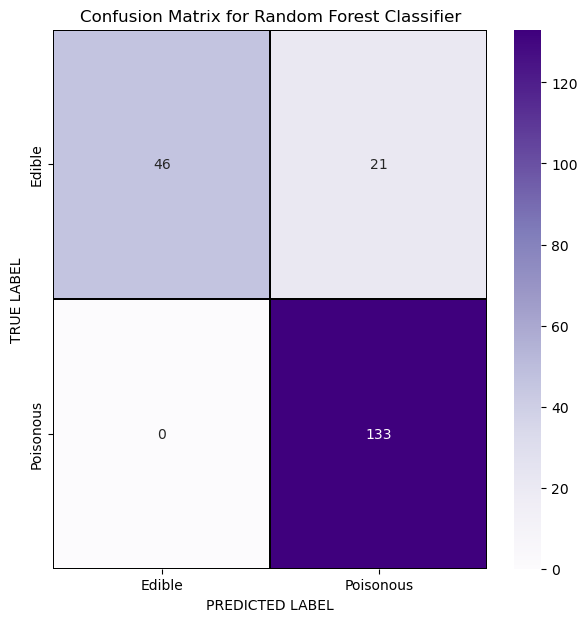

In [75]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Predictions

### Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [76]:
preds = dt.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0]
[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0]


### As we can see the predicted and the true values match 100%.

# Different kernals in SVM

# Linear Kernel

Accuracy: 0.95


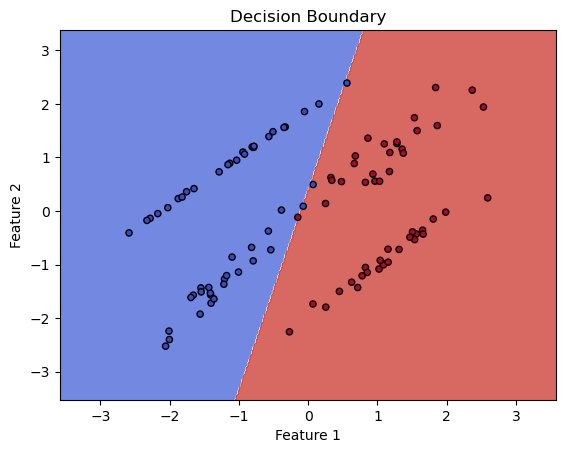

In [82]:
# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier with linear kernel
svm_linear = SVC(kernel='linear')

# Train the classifier
svm_linear.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_linear.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_linear, X, y)


# Polynomial Kernel

Accuracy: 0.9


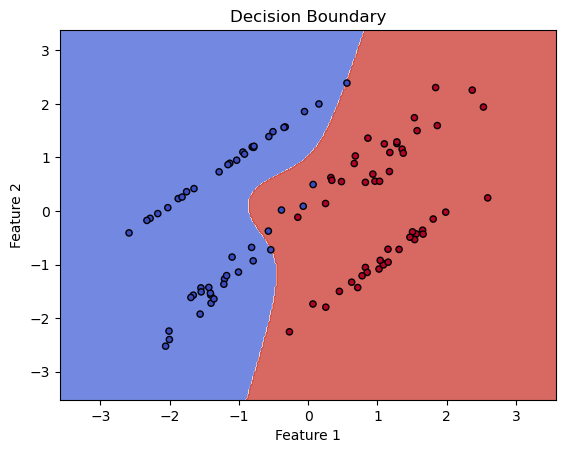

In [83]:
# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree of the polynomial

# Train the classifier
svm_poly.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_poly.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_poly, X, y)


# Radial Basis Function (RBF) Kernel 

Accuracy: 1.0


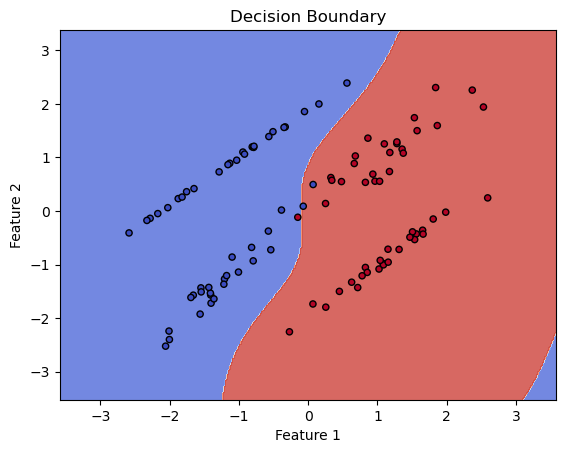

In [84]:
# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')  # You can adjust the gamma parameter if needed

# Train the classifier
svm_rbf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_rbf, X, y)


# Sigmoid Kernel

Accuracy: 0.95


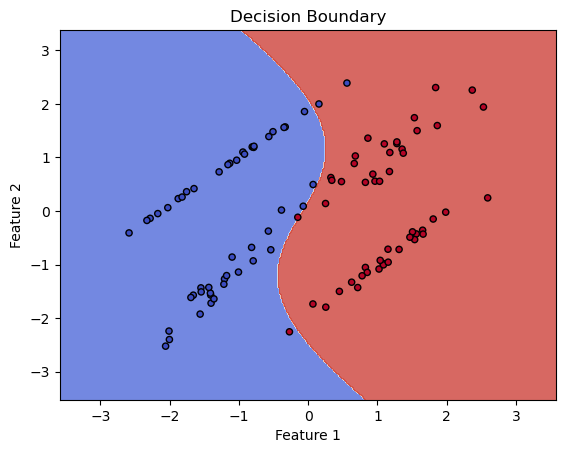

In [85]:
# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier with Sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale')  # You can adjust the gamma parameter if needed
# You can also adjust the coef0 parameter if needed

# Train the classifier
svm_sigmoid.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_sigmoid.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_sigmoid, X, y)
